# Preprocesamiento datos Tiendanube

Esta notebook se encarga de preprocesar los datos con el fin de que puedan ser utilizados para el entrenamiento de un modelo predictivo (clasificador)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de datos

In [2]:
df_data = pd.read_csv('test_data.csv', delimiter=';', index_col=0)
df_data.head()

,id,country,creation_platform,admin_visits,intercom_conversations,source_pulido,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target
0,589015,BR,mobile_app,1.0,0.0,Other,6,3,2.0,1,0.0,215.0,6.0,0.0,0
1,589016,BR,mobile_web,2.0,0.0,Google CPC no Brand,6,3,1.0,1,0.0,0.0,44.0,0.0,0
2,589017,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,16.0,0.0,0
3,589018,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,15.0,0.0,0
4,589019,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,24.0,0.0,0


In [3]:
df_data.describe()

,id,admin_visits,intercom_conversations,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target
count,5.853400e+05,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000,585340.000000
mean,8.849227e+05,1.091154,0.005793,2.725496,13.565886,5.232655,5.198054,1.289987,7.105310,68.441636,0.895406,0.080071
std,1.711352e+05,0.543782,0.118485,1.937653,7.157861,104.301081,97.490506,9.712947,36.444225,124.612021,12.274338,0.271404
min,5.890150e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.365218e+05,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
50%,8.847855e+05,1.000000,0.000000,3.000000,15.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000
75%,1.032991e+06,1.000000,0.000000,4.000000,19.000000,1.000000,1.000000,0.000000,0.000000,70.000000,0.000000,0.000000
max,1.181809e+06,22.000000,27.000000,6.000000,23.000000,28530.000000,28530.000000,3059.000000,1706.000000,14596.000000,2527.000000,1.000000


## Normalización de las variables numericas

El objetivo es aplicar una técnia de normalización sobre las variables numéricas para que todas ellas se muevan en el mismo rango [0;1]

Las variables a normalizar son:

* **total_events_on_iOS**: registro de la cantidad de eventos que tuvo el trial por un dispositivo con sistema operativo Android
* **total_events_on_Web**: registro de la cantidad de eventos que tuvo el trial por una computadora
* **total_events_on_Android**: registro de la cantidad de eventos que tuvo el trial por un dispositivo con sistema operativo iOS
* **admin_visits**: cantidad de visitas que registró el administrador 
* **intercom_conversations**: cantidad de conversaciones que registró la tienda con el equipo de soporte
* **products_with_description**: cantidad de productos que poseen descripción 
* **total_products_with_images**: cantidad de productos que poseen imagen
* **total_product_categories**: cantidad de categorías de productos creadas

In [4]:
from sklearn.preprocessing import MinMaxScaler

#Creamos un objeto escalador min-max
min_max_scaler = MinMaxScaler()

In [5]:
#Definimos las variables a normarlizar
columnas_a_normalizar = [ 
    'admin_visits',
    'intercom_conversations',
    'products_with_description',
    'total_products_with_images',
    'total_product_categories',
    'total_events_on_Android',
    'total_events_on_Web',
    'total_events_on_iOS',
]

In [6]:
#Creamos un dataset auxiliar
df_data_numerica_norm = df_data[columnas_a_normalizar]
df_data_numerica_norm.head()

,admin_visits,intercom_conversations,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS
0,1.0,0.0,2.0,1,0.0,215.0,6.0,0.0
1,2.0,0.0,1.0,1,0.0,0.0,44.0,0.0
2,1.0,0.0,0.0,0,0.0,0.0,16.0,0.0
3,1.0,0.0,0.0,0,0.0,0.0,15.0,0.0
4,1.0,0.0,0.0,0,0.0,0.0,24.0,0.0


In [7]:
#Escalamos los datos
df_data_numerica_norm = pd.DataFrame(min_max_scaler.fit_transform(df_data_numerica_norm), columns=df_data_numerica_norm.columns)
df_data_numerica_norm.head()

,admin_visits,intercom_conversations,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS
0,0.045455,0.0,0.000070,0.000035,0.0,0.126026,0.000411,0.0
1,0.090909,0.0,0.000035,0.000035,0.0,0.000000,0.003015,0.0
2,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001096,0.0
3,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001028,0.0
4,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001644,0.0


### One hot encoder para variables categoricas

Para las variables categóricas se aplica la técnica de *One Hot Encoder* que permite mapear a las variables categóricas en un vector booleano.

Las variables a mapear son:

* **country**: país de origen del trial
* **creation_platform**: plataforma por la cual se creó la tienda 
* **source_pulido**: origen de la tienda por campaña de marketing
* **creation_weekday**: día de la semana en que se creó la tienda

In [10]:
columnas_categoricas =['country', 'creation_platform', 'source_pulido', 'creation_weekday']

In [13]:
df_data_categorica = df_data[columnas_categoricas]
df_data_categorica['creation_weekday'] = df_data_categorica['creation_weekday'].apply(lambda x : str(x))
df_data_categorica.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country,creation_platform,source_pulido,creation_weekday
0,BR,mobile_app,Other,6
1,BR,mobile_web,Google CPC no Brand,6
2,BR,mobile_web,Google CPC no Brand,6
3,BR,mobile_web,Google CPC no Brand,6
4,BR,mobile_web,Google CPC no Brand,6


In [14]:
df_data_categorica =pd.get_dummies(df_data_categorica, prefix=columnas_categoricas)
df_data_categorica.head()

,country_AR,country_BR,country_CL,country_CO,country_MX,creation_platform_desktop,creation_platform_mobile_app,creation_platform_mobile_web,creation_platform_tablet,source_pulido_0,...,source_pulido_Store Referral,source_pulido_none,source_pulido_partners,creation_weekday_0,creation_weekday_1,creation_weekday_2,creation_weekday_3,creation_weekday_4,creation_weekday_5,creation_weekday_6
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Concatenar las variables

A continuación se unen las ambos tipos de variables en un solo dataframe

In [15]:
df_procesado = pd.concat([df_data_numerica_norm, df_data_categorica], axis=1)
df_procesado['target'] = df_data['target'] 
df_procesado.head()

,admin_visits,intercom_conversations,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,country_AR,country_BR,...,source_pulido_none,source_pulido_partners,creation_weekday_0,creation_weekday_1,creation_weekday_2,creation_weekday_3,creation_weekday_4,creation_weekday_5,creation_weekday_6,target
0,0.045455,0.0,0.000070,0.000035,0.0,0.126026,0.000411,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.090909,0.0,0.000035,0.000035,0.0,0.000000,0.003015,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001096,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001028,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001644,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [16]:
df_procesado.to_csv('data_procesada.csv', index=False)

Luego se extrae una muestra representativa con el fin de poder entrenar y analizar rápidamente diversos tipos de **clasificadores**

In [17]:
df_sample = df_procesado.sample(frac=0.2)
df_sample.shape

(117068, 37)

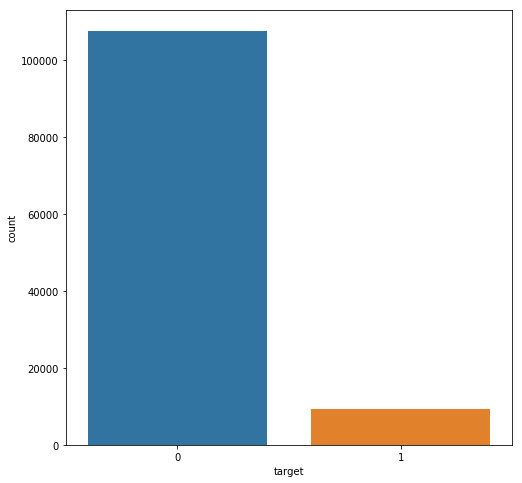

In [18]:
plt.figure(figsize=(8,8))
sns.countplot(x='target', data=df_sample)

In [19]:
df_sample.to_csv('dataset_desbalanceado.csv', index=False)

### Dataset balanceado

Dado que se trata de una dataset desbalanceado hacia la **clase 0** (es decir, aquellos usuarios que no se pasarán a *payment*), a continuación se genera un dataset equilibrado descartando instancias de la **clase 0** (pero tratando de mantener las particularidades de dicha clase). 

Esta estrategia, si bien implica no aprovechar el total de datos disponibles, permite equilibrar el dataset en favor de la **clase 1** (es decir, aquellos usuarios que se pasarán a *payment*) que es nuestra clase de interés. De esta manera los clasificadores entrenados no se dejarán influenciar por la tendencia del dataset original

Primero, dividimos el dataframe en dos: uno para la **clase 0** y otro para la **clase 1**

In [20]:
df_positivo = df_procesado[df_procesado['target'] == 1]
df_positivo.head()

,admin_visits,intercom_conversations,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,country_AR,country_BR,...,source_pulido_none,source_pulido_partners,creation_weekday_0,creation_weekday_1,creation_weekday_2,creation_weekday_3,creation_weekday_4,creation_weekday_5,creation_weekday_6,target
106,0.045455,0.0,0.000280,0.000280,0.001308,0.004103,0.011853,0.0,1,0,...,0,0,0,0,0,0,0,0,1,1
235,0.045455,0.0,0.000070,0.000070,0.000000,0.000000,0.003905,0.0,0,1,...,0,0,0,0,0,0,0,0,1,1
297,0.090909,0.0,0.000035,0.000035,0.006211,0.000000,0.021033,0.0,0,1,...,0,0,0,0,0,0,0,0,1,1
307,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000274,0.0,1,0,...,0,0,0,0,0,0,0,0,1,1
339,0.090909,0.0,0.000000,0.000000,0.000000,0.000000,0.010003,0.0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [21]:
df_negativo = df_procesado[df_procesado['target'] == 0]
df_negativo.head()

,admin_visits,intercom_conversations,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,country_AR,country_BR,...,source_pulido_none,source_pulido_partners,creation_weekday_0,creation_weekday_1,creation_weekday_2,creation_weekday_3,creation_weekday_4,creation_weekday_5,creation_weekday_6,target
0,0.045455,0.0,0.000070,0.000035,0.0,0.126026,0.000411,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.090909,0.0,0.000035,0.000035,0.0,0.000000,0.003015,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001096,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001028,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001644,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0


Luego, se toma una muestra de dataframe de la **clase 0** que tenga un tamaño similar al dataframe de la **clase 1**

In [22]:
clases_positivas = df_positivo.shape[0]
clases_positivas

46869

In [23]:
df_negativo_muestra = df_negativo.sample(n= (clases_positivas + int(clases_positivas*0.1)))
df_negativo_muestra.head()

,admin_visits,intercom_conversations,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,country_AR,country_BR,...,source_pulido_none,source_pulido_partners,creation_weekday_0,creation_weekday_1,creation_weekday_2,creation_weekday_3,creation_weekday_4,creation_weekday_5,creation_weekday_6,target
560747,0.090909,0.0,0.0,0.0,0.0,0.0,0.020554,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
31354,0.045455,0.0,0.0,0.0,0.0,0.0,0.000411,0.0,0,1,...,0,0,0,0,0,1,0,0,0,0
543279,0.045455,0.0,0.0,0.0,0.0,0.0,0.001096,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0
38272,0.045455,0.0,0.0,0.0,0.0,0.0,0.001987,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0
457165,0.000000,0.0,0.0,0.0,0.0,0.0,0.000069,0.0,0,1,...,0,0,0,1,0,0,0,0,0,0


Finalemente se unen en un solo dataset

In [24]:
df_balanceado = pd.concat([df_positivo, df_negativo_muestra])
df_balanceado = df_balanceado.sort_index()
df_balanceado.head()

,admin_visits,intercom_conversations,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,country_AR,country_BR,...,source_pulido_none,source_pulido_partners,creation_weekday_0,creation_weekday_1,creation_weekday_2,creation_weekday_3,creation_weekday_4,creation_weekday_5,creation_weekday_6,target
2,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001096,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
10,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001576,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
16,0.045455,0.0,0.000035,0.000035,0.0,0.000000,0.001713,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
31,0.045455,0.0,0.000035,0.000035,0.0,0.000000,0.004522,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,0.045455,0.0,0.000000,0.000000,0.0,0.002345,0.000000,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0


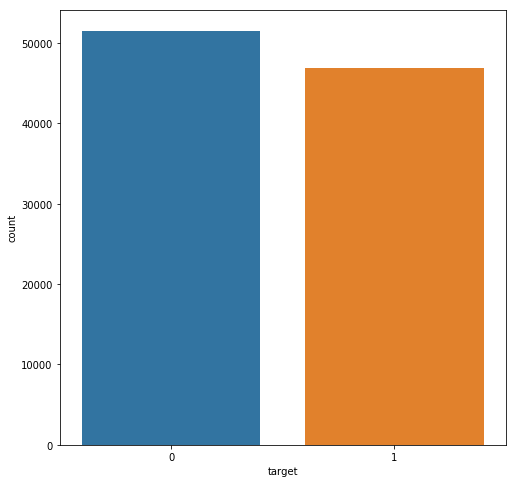

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(x='target', data=df_balanceado)

In [26]:
df_balanceado.to_csv('dataset_balanceado.csv', index=False)